# WAIpractice - Decision Trees with Python (scikit-learn)
25.05.2023 - by Giulia Osti

In [ ]:
# Required
!pip install ydata-profiling

In [ ]:
# Load modules
import pandas as pd
from ydata_profiling import ProfileReport # they changed pandas-profiling into ydata-profiling, see: https://github.com/ydataai/ydata-profiling
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

As first step, let's retrieve our dataset from GitHub:

In [ ]:
# Locate the dataset
raw = 'https://raw.githubusercontent.com/semanticnoodles/WAItutorial/main/productivity_dataset.csv'

# Read it
dataset = pd.read_csv(raw, index_col=0)

And then let's get some info about and a quick preview of our dataset:

In [ ]:
# Preview the first 10 rows
dataset.head(10)

,day,focus_technique,location,task_type,task_duration,pauses_duration,motivation
0,Tuesday,Zen to Done,Coffee Shop,Note Taking,120,10,Low
1,Monday,Eat the Frog,Outdoors,Note Taking,60,10,Medium
2,Tuesday,Task Batching,Outdoors,Writing,150,25,Low
3,Tuesday,Eat the Frog,Library,Coding,180,15,Medium
4,Friday,Eat the Frog,Outdoors,Planning,180,15,Medium
5,Thursday,Deep Work,Library,Writing,120,15,Medium
6,Wednesday,Eat the Frog,Home,Planning,60,5,High
7,Saturday,Task Batching,Coffee Shop,Reading,30,20,Low
8,Wednesday,Task Batching,Office,Planning,90,10,Medium
9,Monday,Task Batching,Outdoors,Reading,30,25,Medium


Now, using the lovely module ydata-profiling we can get some insights about our dataset

In [ ]:
ProfileReport(dataset, title = 'Productivity dataset overview')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The following steps are pretty much conventional: if you plan to use machine learning you will necessarily need to have a `Training` and a `Test` set, no matter the algorythm you are planning to work with. But, first of all, we will need to discriminate between our target variable and the remaining features.

In [ ]:
# Define the features
X = dataset.drop('focus_technique', axis=1)

# Define the target
y = dataset['focus_technique']

In [ ]:
# Convert categorical variables into numerical representation using one-hot encoding
X = pd.get_dummies(X)

In [ ]:
# Preview
X.head()

,task_duration,pauses_duration,day_Friday,day_Monday,day_Saturday,day_Thursday,day_Tuesday,day_Wednesday,location_Coffee Shop,location_Home,...,location_Office,location_Outdoors,task_type_Coding,task_type_Note Taking,task_type_Planning,task_type_Reading,task_type_Writing,motivation_High,motivation_Low,motivation_Medium
0,120,10,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,60,10,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,150,25,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,180,15,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,180,15,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


# Dataset split

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Classification Tree

In [ ]:
# Call the classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Let's predict
y_pred = clf.predict(X_test)

# Visualisation

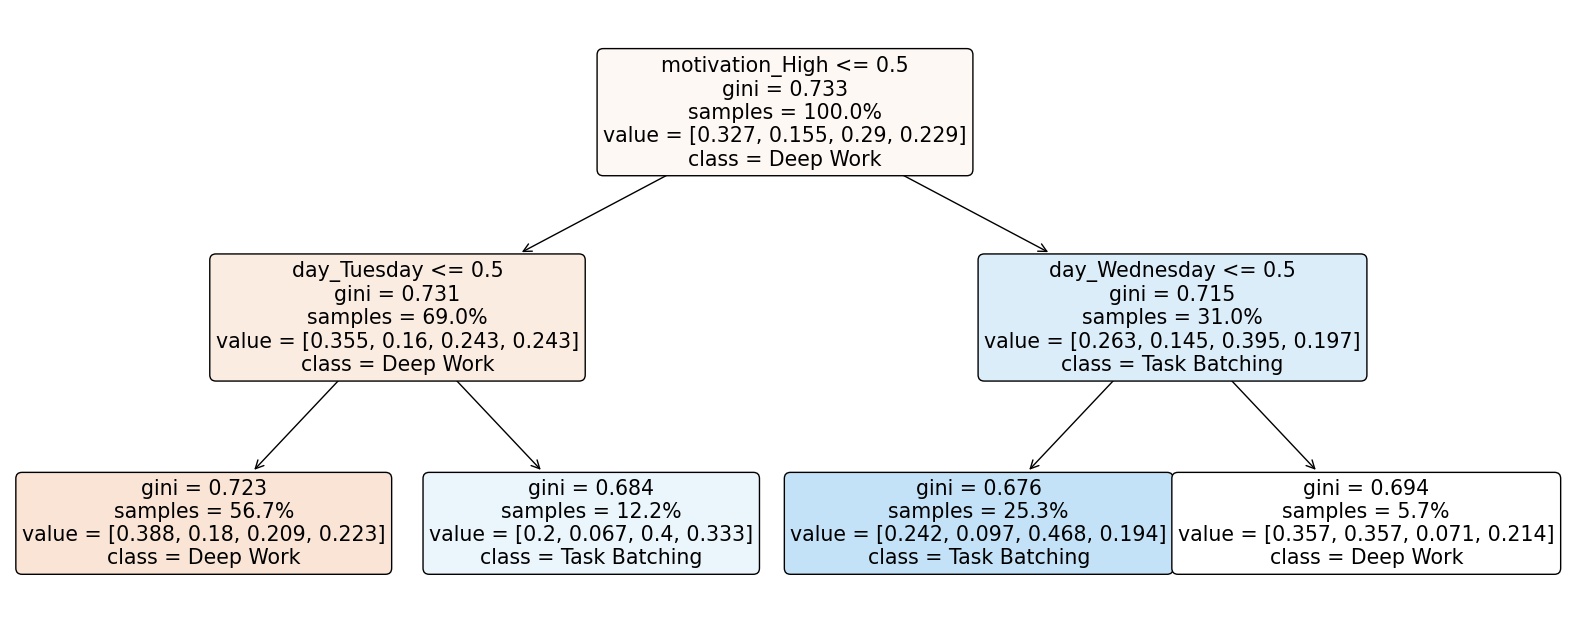

In [ ]:
# Define the size
fig = plt.figure(figsize=(20, 8))

# Plot the tree
tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, proportion=True, rounded=True)
plt.show()

# Evaluation

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Get to know the hard truth
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.26666666666666666
Precision: 0.1473941689351797
Recall: 0.26666666666666666
F1-Score: 0.18730451320313074
